In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import requests
from io import StringIO
import csv

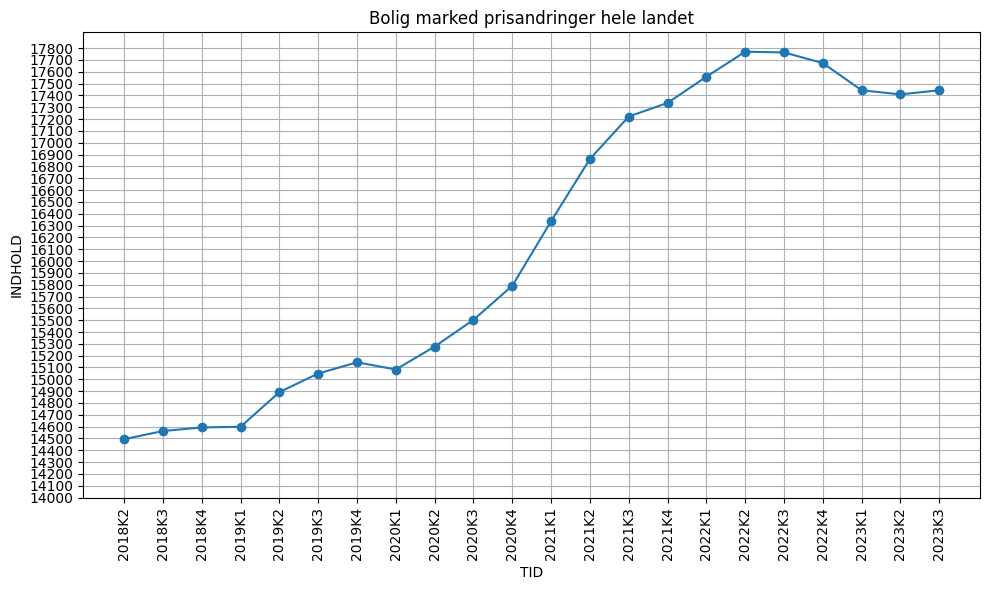

In [12]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../data/BMP.csv', sep=';')

filterBy = "Hele landet"

# Filter the DataFrame
filtered_df = df[(df['TID'] > '2018K1') & (df['OMR20'] == filterBy)]

# Convert 'INDHOLD' column to numeric type using .loc
filtered_df.loc[:, 'INDHOLD'] = pd.to_numeric(filtered_df['INDHOLD'])

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['TID'], filtered_df['INDHOLD'], marker='o', linestyle='-')

# Adding title and labels
plt.title('Bolig marked prisandringer ' + filterBy.lower())
plt.xlabel('TID')
plt.ylabel('INDHOLD')

# Setting y-axis ticks from 14000 to the maximum INDHOLD value, incrementing by 100
plt.yticks(range(14000, int(filtered_df['INDHOLD'].max()) + 100, 100))

# Rotating x-axis tick labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()